In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

## Data

Reference: https://towardsdatascience.com/10-minutes-to-building-a-cnn-binary-image-classifier-in-tensorflow-4e216b2034aa

In [2]:
labels = ['beetles', 'cockroach', 'dragonflies']

for i in labels:
    path_train = './insects/train/' + i
    path_test = './insects/test/' + i
    print(f'Number of {i} images in the training set:', len(os.listdir(path_train)))
    print(f'Number of {i} images in the testing set:', len(os.listdir(path_test)))

Number of beetles images in the training set: 460
Number of beetles images in the testing set: 60
Number of cockroach images in the training set: 240
Number of cockroach images in the testing set: 60
Number of dragonflies images in the training set: 319
Number of dragonflies images in the testing set: 60


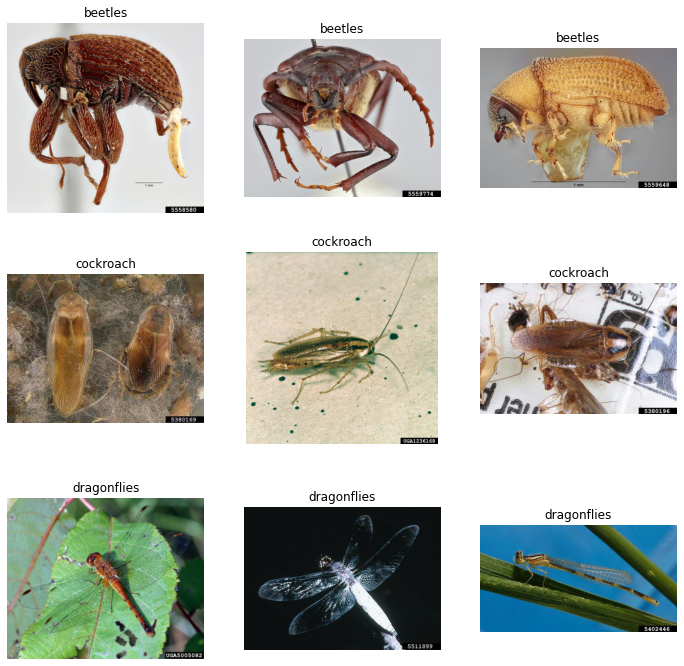

In [3]:
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
axs = axs.ravel()

for i in range(len(labels)):
    path_train = './insects/train/' + labels[i]
    for j in range(3):
        np.random.seed(j)
        axs[3*i+j].imshow(mpimg.imread(path_train + '/' + np.random.choice(os.listdir(path_train))))
        axs[3*i+j].axis('Off')
        axs[3*i+j].set_title(labels[i])

In [4]:
# normalize
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

# import data from directory
train_generator = train_datagen.flow_from_directory('./insects/train/', 
                                                    target_size = (256, 256),
                                                    batch_size = 32,
                                                    class_mode='sparse')
test_generator = test_datagen.flow_from_directory('./insects/test/', 
                                                  target_size = (256, 256),
                                                  batch_size = 32,
                                                  class_mode='sparse')

Found 1019 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


In [5]:
print('The size of training input:', train_generator[0][0].shape)
print('The size of training output:', train_generator[0][1].shape)
print('The maximum value after normalization:', np.max(train_generator[0][0]))
print('The minimum value after normalization:', np.min(train_generator[0][0]))

The size of training input: (32, 256, 256, 3)
The size of training output: (32,)
The maximum value after normalization: 1.0
The minimum value after normalization: 0.0


## CNN Model

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same', input_shape=(256,256,3)),
                                    tf.keras.layers.MaxPool2D(),
                                    tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
                                    tf.keras.layers.MaxPool2D(),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(3)])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               16777344  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

In [8]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [9]:
history = model.fit(train_generator,
                    epochs = 16,
                    validation_data = test_generator)

Epoch 1/16
32/32 [==============================] - 42s 1s/step - loss: 1.2411 - accuracy: 0.6742 - val_loss: 0.4909 - val_accuracy: 0.8833
Epoch 2/16
32/32 [==============================] - 42s 1s/step - loss: 0.2626 - accuracy: 0.9009 - val_loss: 0.2054 - val_accuracy: 0.9389
Epoch 3/16
32/32 [==============================] - 51s 2s/step - loss: 0.0960 - accuracy: 0.9764 - val_loss: 0.0963 - val_accuracy: 0.9778
Epoch 4/16
32/32 [==============================] - 42s 1s/step - loss: 0.1118 - accuracy: 0.9568 - val_loss: 0.1933 - val_accuracy: 0.9222
Epoch 5/16
32/32 [==============================] - 49s 2s/step - loss: 0.0845 - accuracy: 0.9745 - val_loss: 0.0822 - val_accuracy: 0.9722
Epoch 6/16
32/32 [==============================] - 51s 2s/step - loss: 0.0299 - accuracy: 0.9941 - val_loss: 0.0194 - val_accuracy: 0.9944
Epoch 7/16
32/32 [==============================] - 45s 1s/step - loss: 0.0089 - accuracy: 0.9990 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 8/16
32/32 [==

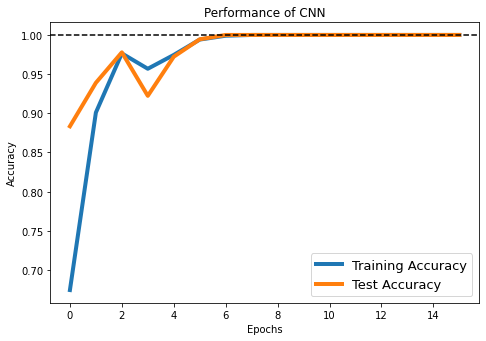

In [10]:
plt.rcParams['figure.figsize'] = 7, 5
plt.plot(history.epoch, history.history['accuracy'], '-', linewidth=4.0, label='Training Accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], '-', linewidth=4.0, label='Test Accuracy')
plt.axhline(y = 1, color = 'black', linestyle = '--')

plt.title('Performance of CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.rcParams.update({'font.size': 15})
plt.legend(loc = 'best', prop = {'size':13})
plt.tight_layout()